## Work
1. 請比較使用不同層數以及不同 Dropout rate 對訓練的效果
2. 將 optimizer 改成使用 Adam 並加上適當的 dropout rate 檢視結果

In [1]:
import os
import keras
import itertools
from keras.layers import Dropout
from keras.regularizers import l2

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:

def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128], drp_ratio=0.2, l2_ratio=0):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1),
                                   kernel_regularizer=l2(l2_ratio))(input_layer)
            x = Dropout(drp_ratio)(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1),
                                   kernel_regularizer=l2(l2_ratio))(x)
            x = Dropout(drp_ratio)(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    
    return model

In [6]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 256
Dropout_EXP = [0.25, 0.5]
NEURONS = [[512, 256, 128],[512, 256, 128, 64, 32]]
L2_ratio = [1e-3]

In [7]:
results = {}

"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for layer in NEURONS:
    for dv in Dropout_EXP:
        keras.backend.clear_session() # 把舊的 Graph 清掉
        print("Experiment with dropout - %.2f" % dv)
        model = build_mlp(input_shape=x_train.shape[1:], num_neurons=layer, drp_ratio=dv, l2_ratio=L2_ratio)
        model.summary()
        optimizer = keras.optimizers.Adam(lr=LEARNING_RATE, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0, amsgrad=False)
        model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

        model.fit(x_train, y_train,
                  epochs=EPOCHS, 
                  batch_size=BATCH_SIZE,
                  validation_data=(x_test, y_test),
                  shuffle=True)

        # Collect results
        train_loss = model.history.history["loss"]
        valid_loss = model.history.history["val_loss"]
        train_acc = model.history.history["acc"]
        valid_acc = model.history.history["val_acc"]
    
        exp_name_tag = "exp-neurons %s-dropout-%s" % (str(layer), str(dv))
        results[exp_name_tag] = {'train-loss': train_loss,
                                 'valid-loss': valid_loss,
                                 'train-acc': train_acc,
                                 'valid-acc': valid_acc}

W0724 18:17:33.313783 12908 deprecation_wrapper.py:119] From D:\Anaconda3\envs\keras37\lib\site-packages\keras\backend\tensorflow_backend.py:95: The name tf.reset_default_graph is deprecated. Please use tf.compat.v1.reset_default_graph instead.

W0724 18:17:33.314781 12908 deprecation_wrapper.py:119] From D:\Anaconda3\envs\keras37\lib\site-packages\keras\backend\tensorflow_backend.py:98: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0724 18:17:33.325752 12908 deprecation_wrapper.py:119] From D:\Anaconda3\envs\keras37\lib\site-packages\keras\backend\tensorflow_backend.py:102: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0724 18:17:33.326750 12908 deprecation_wrapper.py:119] From D:\Anaconda3\envs\keras37\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0724 18:17:33.328745 12

Experiment with dropout - 0.25
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)     

Epoch 50/50
50000/50000 [==============================] - 2s 35us/step - loss: 1.7262 - acc: 0.4124 - val_loss: 1.6385 - val_acc: 0.4497
Experiment with dropout - 0.50
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128

Epoch 49/50
50000/50000 [==============================] - 2s 36us/step - loss: 1.9814 - acc: 0.2706 - val_loss: 2.1210 - val_acc: 0.2338
Epoch 50/50
50000/50000 [==============================] - 2s 36us/step - loss: 1.9854 - acc: 0.2707 - val_loss: 2.1072 - val_acc: 0.2628
Experiment with dropout - 0.25
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
dropout_2 (Dropout)          (Non

Epoch 44/50
50000/50000 [==============================] - 2s 39us/step - loss: 1.8407 - acc: 0.3654 - val_loss: 1.7812 - val_acc: 0.3858
Epoch 45/50
50000/50000 [==============================] - 2s 39us/step - loss: 1.8400 - acc: 0.3642 - val_loss: 1.7431 - val_acc: 0.4205
Epoch 46/50
50000/50000 [==============================] - 2s 39us/step - loss: 1.8480 - acc: 0.3648 - val_loss: 1.7700 - val_acc: 0.4100
Epoch 47/50
50000/50000 [==============================] - 2s 39us/step - loss: 1.8446 - acc: 0.3648 - val_loss: 1.7939 - val_acc: 0.3867
Epoch 48/50
50000/50000 [==============================] - 2s 39us/step - loss: 1.8493 - acc: 0.3624 - val_loss: 1.7565 - val_acc: 0.4076
Epoch 49/50
50000/50000 [==============================] - 2s 39us/step - loss: 1.8504 - acc: 0.3618 - val_loss: 1.7630 - val_acc: 0.3953
Epoch 50/50
50000/50000 [==============================] - 2s 39us/step - loss: 1.8409 - acc: 0.3657 - val_loss: 1.7624 - val_acc: 0.4063
Experiment with dropout - 0.50
___

Epoch 39/50
50000/50000 [==============================] - 2s 39us/step - loss: 2.1470 - acc: 0.1695 - val_loss: 2.1282 - val_acc: 0.1690
Epoch 40/50
50000/50000 [==============================] - 2s 39us/step - loss: 2.1443 - acc: 0.1684 - val_loss: 2.2078 - val_acc: 0.1450
Epoch 41/50
50000/50000 [==============================] - 2s 39us/step - loss: 2.1450 - acc: 0.1714 - val_loss: 2.1731 - val_acc: 0.1548
Epoch 42/50
50000/50000 [==============================] - 2s 39us/step - loss: 2.1404 - acc: 0.1706 - val_loss: 2.1577 - val_acc: 0.1607
Epoch 43/50
50000/50000 [==============================] - 2s 39us/step - loss: 2.1416 - acc: 0.1722 - val_loss: 2.1679 - val_acc: 0.1676
Epoch 44/50
50000/50000 [==============================] - 2s 39us/step - loss: 2.1427 - acc: 0.1718 - val_loss: 2.1257 - val_acc: 0.1765
Epoch 45/50
50000/50000 [==============================] - 2s 40us/step - loss: 2.1416 - acc: 0.1697 - val_loss: 2.1696 - val_acc: 0.1572
Epoch 46/50
50000/50000 [=========

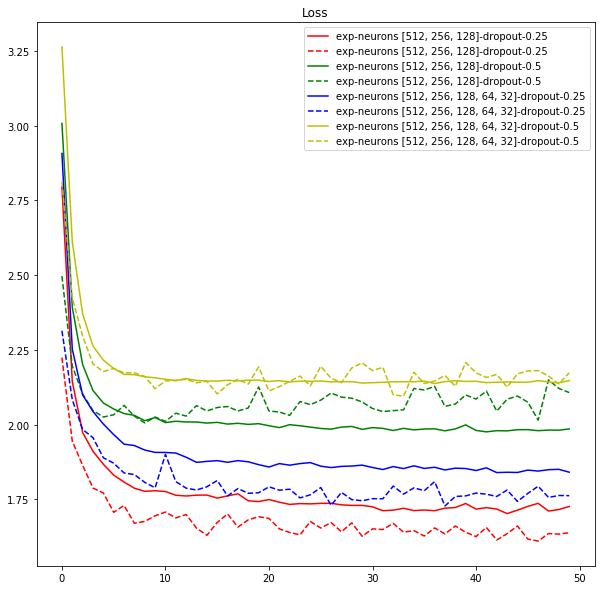

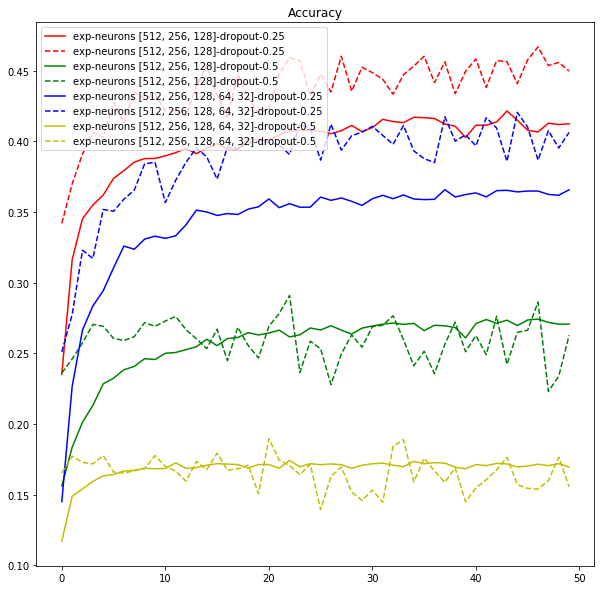

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""

color_bar = ["r", "g", "b", "y", "m", "k"]
             
plt.figure(figsize=(10,10))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])), results[cond]['train-loss'], "-", label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])), results[cond]['valid-loss'], "--", label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(10,10))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]["train-acc"])), results[cond]["train-acc"], "-", label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]["valid-acc"])), results[cond]["valid-acc"], "--", label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

### 結果討論

Dropout值若太大，會導致Accuracy下降

Layer層數變多Accuracy也會下降